# Practical 4: Parallel and Distributed Computing Fundamentals

## Goals

### Understanding Parallel Computing Paradigms
- Sequential vs parallel execution
- Concurrency vs parallelism
- Amdahl's Law and speedup calculations

### Mastering Python's Functional Programming
- `filter()`, `map()`, `reduce()` with lambda expressions
- Generators and iterators for memory-efficient processing

### Implementing Parallel Processing
- `multiprocessing` module (Process, Pool, Queue, Pipe)
- `concurrent.futures` (ThreadPoolExecutor, ProcessPoolExecutor)
- Shared memory and synchronization primitives

### Performance Measurement and Optimization
- Benchmarking parallel code
- Identifying bottlenecks
- Chunking strategies

## Prerequisites

- Completion of Practicals 0-3
- Understanding of Python functions and data structures
- Basic knowledge of computer architecture (CPU cores)

## Exercises Overview

| Exercise | Difficulty | Topics |
|----------|------------|--------|
| Exercise 1 | ★ | Functional programming: filter(), map(), reduce() |
| Exercise 2 | ★ | Lambda expressions and higher-order functions |
| Exercise 3 | ★★ | Generators and iterators for large data |
| Exercise 4 | ★★ | Introduction to multiprocessing |
| Exercise 5 | ★★ | Process communication: Queues and Pipes |
| Exercise 6 | ★★★ | concurrent.futures and async patterns |
| Exercise 7 | ★★★ | Performance benchmarking and optimization |

## Exercise 1 [★] - Functional Programming: filter(), map(), reduce()

In this exercise, we explore functional programming concepts that form the foundation of parallel and distributed data processing. These patterns are used extensively in frameworks like Apache Spark.

### 1. Introduction to Functional Programming

Functional programming emphasizes:
- **Pure functions**: Functions that always produce the same output for the same input and have no side effects
- **Immutability**: Data is not modified after creation
- **First-class functions**: Functions can be passed as arguments and returned from other functions

These principles are essential for parallel processing because they eliminate shared state and make it safe to execute operations concurrently.

### 2. The filter() Function

The `filter(function, iterable)` function returns an iterator containing elements from the iterable for which the function returns `True`.

In [2]:
?filter

Init signature: filter(self, /, *args, **kwargs)
Docstring:     
filter(function or None, iterable) --> filter object

Return an iterator yielding those items of iterable for which function(item)
is true. If function is None, return the items that are true.
Type:           type
Subclasses:     

In [3]:
# Basic filter example: filter even numbers
num = [i for i in range(1, 20)]
print("Original list:", num)

def is_even(item):
    return item % 2 == 0

filtered = list(filter(is_even, num))
print("Even numbers:", filtered)

Original list: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Even numbers: [2, 4, 6, 8, 10, 12, 14, 16, 18]


In [4]:
# Filter with None as function - removes falsy values
mixed = [0, 1, "", "hello", None, 42, [], [1, 2]]
print("Original:", mixed)
print("Filtered (truthy only):", list(filter(None, mixed)))

Original: [0, 1, '', 'hello', None, 42, [], [1, 2]]
Filtered (truthy only): [1, 'hello', 42, [1, 2]]


In [5]:
# Filter odd numbers
def is_odd(item):
    return item % 2 != 0

num = [i for i in range(1, 20)]
filtered = list(filter(is_odd, num))
print("Odd numbers:", filtered)

Odd numbers: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]


**Question 1.1**: Write a function `is_prime(n)` that returns `True` if `n` is a prime number. Then use `filter()` to extract all prime numbers from a list of 1000 random integers between 1 and 1000.

In [6]:
import random

# Generate 1000 random integers
random_numbers = [random.randint(1, 1000) for _ in range(1000)]

# TODO: Implement is_prime function and filter prime numbers


**Question 1.2**: Use `filter()` to extract numbers divisible by both 3 and 5 from the same list.

In [7]:
# TODO: Filter numbers divisible by both 3 and 5


#### Filtering with Nested Structures

The `filter()` function can be applied to complex data structures like lists of dictionaries.

In [8]:
employees = [
    {"name": "Alice", "age": 28, "department": "HR", "salary": 55000},
    {"name": "Bob", "age": 35, "department": "Engineering", "salary": 85000},
    {"name": "Charlie", "age": 22, "department": "Marketing", "salary": 45000},
    {"name": "David", "age": 45, "department": "Engineering", "salary": 95000},
    {"name": "Eve", "age": 31, "department": "HR", "salary": 60000},
    {"name": "Frank", "age": 29, "department": "Engineering", "salary": 78000},
    {"name": "Grace", "age": 38, "department": "Marketing", "salary": 72000},
    {"name": "Henry", "age": 42, "department": "Engineering", "salary": 92000}
]

**Question 1.3**: Using `filter()`, complete the following tasks:
1. Create a list of employees who work in the "Engineering" department
2. Find employees whose age is between 25 and 40 (inclusive)
3. Find employees with salary above 70000
4. Find employees whose name starts with a vowel

In [9]:
# TODO: Implement the filters


#### Advanced String Filtering

In [10]:
sentences = [
    "Data science is transforming industries worldwide.",
    "Python is great.",
    "Machine learning algorithms require massive amounts of data.",
    "Big data technologies enable processing of petabytes.",
    "AI is evolving.",
    "Distributed computing allows horizontal scaling across clusters.",
    "The cloud provides elastic computing resources on demand.",
    "Simple works."
]

**Question 1.4**: Using `filter()`:
1. Select sentences with more than 6 words
2. Select sentences containing the word "data" (case-insensitive)
3. Select sentences where the average word length is greater than 5 characters

In [11]:
# TODO: Implement the filters


### 3. The map() Function

The `map(function, iterable, ...)` function applies a function to every item in an iterable and returns an iterator of results.

In [12]:
?map

Init signature: map(self, /, *args, **kwargs)
Docstring:     
map(func, *iterables) --> map object

Make an iterator that computes the function using arguments from
each of the iterables.  Stops when the shortest iterable is exhausted.
Type:           type
Subclasses:     

In [13]:
# Basic map example: square each number
def square(x):
    return x * x

num = [i for i in range(1, 11)]
squared = list(map(square, num))
print("Original:", num)
print("Squared:", squared)

Original: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Squared: [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


In [14]:
# Map with multiple iterables
def multiply(x, y):
    return x * y

list1 = [1, 2, 3, 4, 5]
list2 = [10, 20, 30, 40, 50]

products = list(map(multiply, list1, list2))
print("Products:", products)

Products: [10, 40, 90, 160, 250]


In [15]:
# Map with three iterables
def weighted_sum(a, b, c):
    return a + 2*b + 3*c

x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]

result = list(map(weighted_sum, x, y, z))
print("Weighted sums:", result)

Weighted sums: [30, 36, 42]


**Question 1.5**: Given a list of 100,000 file paths, use `map()` to:
1. Extract file extensions (e.g., `.txt`, `.csv`)
2. Extract file names without extensions
3. Calculate path depths (number of directories)

In [16]:
import os
import random

# Generate sample file paths
extensions = ['.txt', '.csv', '.json', '.xml', '.py', '.md']
directories = ['data', 'src', 'docs', 'config', 'tests', 'output']

file_paths = [
    os.path.join(
        random.choice(directories),
        random.choice(directories),
        f"file_{i}{random.choice(extensions)}"
    )
    for i in range(100000)
]

print("Sample paths:", file_paths[:5])

# TODO: Use map() to extract extensions, names, and calculate depths


Sample paths: ['src/src/file_0.txt', 'data/tests/file_1.py', 'docs/data/file_2.txt', 'config/data/file_3.csv', 'tests/src/file_4.json']


**Question 1.6**: Use `map()` to normalize a dataset of 50,000 text strings:
- Convert to lowercase
- Strip leading/trailing whitespace
- Remove punctuation

In [17]:
import string

# Generate sample text data
sample_words = ["Hello", "World", "Data", "Science", "Python", "Analysis"]
punctuation_marks = list("!.,;:?")

text_data = [
    f"  {random.choice(sample_words)}{random.choice(punctuation_marks)}  ".upper()
    if random.random() > 0.5 else
    f"{random.choice(sample_words)} {random.choice(sample_words)}{random.choice(punctuation_marks)}"
    for _ in range(50000)
]

print("Sample data:", text_data[:5])

# TODO: Use map() to normalize the text data


Sample data: ['Hello Science?', '  HELLO;  ', 'Data Hello,', '  DATA;  ', 'Science Data:']


### 4. The reduce() Function

The `reduce(function, iterable)` function applies a function of two arguments cumulatively to the items of an iterable, from left to right, reducing it to a single value.

In [18]:
from functools import reduce

?reduce

Docstring:
reduce(function, iterable[, initial]) -> value

Apply a function of two arguments cumulatively to the items of a sequence
or iterable, from left to right, so as to reduce the iterable to a single
value.  For example, reduce(lambda x, y: x+y, [1, 2, 3, 4, 5]) calculates
((((1+2)+3)+4)+5).  If initial is present, it is placed before the items
of the iterable in the calculation, and serves as a default when the
iterable is empty.
Type:      builtin_function_or_method

In [19]:
# Sum of numbers using reduce
from functools import reduce

def add(x, y):
    return x + y

num = [i for i in range(1, 11)]
total = reduce(add, num)
print(f"Sum of {num} = {total}")

Sum of [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] = 55


In [20]:
# Product of numbers
def multiply(x, y):
    return x * y

num = [1, 2, 3, 4, 5]
product = reduce(multiply, num)
print(f"Product of {num} = {product}")

Product of [1, 2, 3, 4, 5] = 120


In [21]:
# Finding maximum using reduce
def max_of_two(x, y):
    return x if x > y else y

num = [45, 12, 89, 34, 67, 23, 90, 11]
maximum = reduce(max_of_two, num)
print(f"Maximum of {num} = {maximum}")

Maximum of [45, 12, 89, 34, 67, 23, 90, 11] = 90


**Question 1.7**: Use `reduce()` to:
1. Find the longest string in a list of 10,000 strings
2. Flatten a nested list (3 levels deep)
3. Concatenate a list of strings with a separator

In [22]:
# Generate sample data
words = ["algorithm", "data", "processing", "distributed", "computing", 
         "parallel", "optimization", "scalability", "performance"]

string_list = [random.choice(words) * random.randint(1, 5) for _ in range(10000)]

nested_list = [
    [[1, 2], [3, 4]],
    [[5, 6], [7, 8]],
    [[9, 10], [11, 12]]
]

# TODO: Implement reduce operations


#### Matrix Operations with map() and reduce()

In [23]:
matrices = [
    [[1, 2], [3, 4]],
    [[5, 6], [7, 8]],
    [[9, 10], [11, 12]],
    [[13, 14], [15, 16]]
]

**Question 1.8**: Using `map()` and `reduce()`:
1. Compute the sum of all matrices
2. Compute the element-wise product of two matrices
3. Filter matrices where all elements are greater than 5

In [24]:
# TODO: Implement matrix operations


#### Data Transformation and Aggregation

In [25]:
products = [
    {"name": "Laptop", "price": 1200, "quantity": 3, "category": "Electronics"},
    {"name": "Smartphone", "price": 800, "quantity": 5, "category": "Electronics"},
    {"name": "Tablet", "price": 300, "quantity": 10, "category": "Electronics"},
    {"name": "Desk", "price": 250, "quantity": 8, "category": "Furniture"},
    {"name": "Chair", "price": 150, "quantity": 20, "category": "Furniture"},
    {"name": "Monitor", "price": 350, "quantity": 7, "category": "Electronics"},
    {"name": "Keyboard", "price": 75, "quantity": 25, "category": "Electronics"},
    {"name": "Bookshelf", "price": 180, "quantity": 5, "category": "Furniture"}
]

**Question 1.9**: Using `map()`, `filter()`, and `reduce()`:
1. Calculate the total inventory value (price * quantity for all products)
2. Find products priced above 200
3. Apply a 15% discount to all Electronics and return the updated list
4. Calculate the total value by category

In [26]:
# TODO: Implement the operations


## Exercise 2 [★] - Lambda Expressions and Higher-Order Functions

Lambda expressions are anonymous functions that can be defined inline. They are particularly useful with `filter()`, `map()`, and `reduce()`.

### 1. Lambda Expression Basics

In [27]:
# Lambda with filter
num = list(range(1, 21))
even = list(filter(lambda x: x % 2 == 0, num))
print("Even numbers:", even)

Even numbers: [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]


In [28]:
# Lambda with map
squared = list(map(lambda x: x ** 2, num))
print("Squared:", squared)

Squared: [1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400]


In [29]:
# Lambda with multiple arguments
list1 = [1, 2, 3, 4, 5]
list2 = [10, 20, 30, 40, 50]
products = list(map(lambda x, y: x * y, list1, list2))
print("Products:", products)

Products: [10, 40, 90, 160, 250]


In [30]:
# Lambda with reduce
from functools import reduce

total = reduce(lambda x, y: x + y, num)
print(f"Sum: {total}")

product = reduce(lambda x, y: x * y, [1, 2, 3, 4, 5])
print(f"Product: {product}")

Sum: 210
Product: 120


### 2. Higher-Order Functions and Closures

In [31]:
# A closure - function that remembers values from enclosing scope
def make_multiplier(n):
    def multiplier(x):
        return x * n
    return multiplier

double = make_multiplier(2)
triple = make_multiplier(3)

print("Double 5:", double(5))
print("Triple 5:", triple(5))

# Using with map
numbers = [1, 2, 3, 4, 5]
print("Doubled:", list(map(double, numbers)))

Double 5: 10
Triple 5: 15
Doubled: [2, 4, 6, 8, 10]


In [32]:
# Using functools.partial for partial function application
from functools import partial

def power(base, exponent):
    return base ** exponent

square = partial(power, exponent=2)
cube = partial(power, exponent=3)

print("Square of 5:", square(5))
print("Cube of 5:", cube(5))

Square of 5: 25
Cube of 5: 125


**Question 2.1**: Create a filter factory function that generates filter predicates:
1. `make_range_filter(min_val, max_val)` - returns a function that checks if a value is in range
2. `make_threshold_filter(threshold, comparison)` - returns a function for threshold comparisons
3. Use these with `filter()` on a dataset

In [33]:
# TODO: Implement filter factory functions


### 3. Function Composition

In [34]:
# Composing functions: f(g(x))
def compose(f, g):
    return lambda x: f(g(x))

def add_one(x):
    return x + 1

def square(x):
    return x * x

# (x + 1)^2
add_then_square = compose(square, add_one)
print("(3 + 1)^2 =", add_then_square(3))

# x^2 + 1
square_then_add = compose(add_one, square)
print("3^2 + 1 =", square_then_add(3))

(3 + 1)^2 = 16
3^2 + 1 = 10


**Question 2.2**: Implement a `pipeline()` function that composes multiple functions and use it to create a data cleaning pipeline:
1. Strip whitespace
2. Convert to lowercase
3. Remove special characters
4. Replace multiple spaces with single space

In [35]:
# TODO: Implement pipeline function and data cleaning pipeline


#### Text Analysis with Lambda Expressions

In [36]:
sentences = [
    "Big data analytics transforms raw data into actionable insights.",
    "Cloud computing enables scalable infrastructure.",
    "Machine learning models require training on large datasets.",
    "Data pipelines automate the flow of information.",
    "Distributed systems provide fault tolerance and high availability.",
    "Real-time processing handles streaming data efficiently.",
    "Data governance ensures quality and compliance.",
    "APIs enable seamless integration between services."
]

**Question 2.3**: Using `map()`, `filter()`, `reduce()` with lambda expressions:
1. Count the total number of words in all sentences
2. Find the sentence with the most words
3. Extract all unique words across all sentences
4. Calculate the average sentence length (in words)

In [37]:
# TODO: Implement text analysis with lambdas


#### Financial Data Processing

In [38]:
transactions = [
    {"date": "2025-01-10", "type": "income", "amount": 5000, "category": "salary"},
    {"date": "2025-01-11", "type": "expense", "amount": 150, "category": "utilities"},
    {"date": "2025-01-12", "type": "expense", "amount": 80, "category": "food"},
    {"date": "2025-01-13", "type": "income", "amount": 200, "category": "freelance"},
    {"date": "2025-01-14", "type": "expense", "amount": 500, "category": "rent"},
    {"date": "2025-01-15", "type": "expense", "amount": 60, "category": "transport"},
    {"date": "2025-01-16", "type": "income", "amount": 150, "category": "freelance"},
    {"date": "2025-01-17", "type": "expense", "amount": 200, "category": "food"},
    {"date": "2025-01-18", "type": "expense", "amount": 100, "category": "entertainment"},
]

**Question 2.4**: Using lambda expressions:
1. Calculate net balance (total income - total expenses)
2. Find all expenses above 100
3. Group transactions by category and calculate totals
4. Find the largest expense

In [39]:
# TODO: Implement financial data processing


## Exercise 3 [★★] - Generators and Iterators for Large Data

When processing massive datasets, loading everything into memory is often impossible. Generators provide a memory-efficient way to process data lazily.

### 1. Generator Basics

In [40]:
# List comprehension vs generator expression
import sys

# List - stores all values in memory
list_comp = [x ** 2 for x in range(1000000)]
print(f"List size: {sys.getsizeof(list_comp):,} bytes")

# Generator - computes values on demand
gen_exp = (x ** 2 for x in range(1000000))
print(f"Generator size: {sys.getsizeof(gen_exp):,} bytes")

List size: 8,448,728 bytes
Generator size: 104 bytes


In [41]:
# Generator function using yield
def count_up_to(n):
    """Generator that yields numbers from 1 to n"""
    i = 1
    while i <= n:
        yield i
        i += 1

# Using the generator
counter = count_up_to(5)
print("Type:", type(counter))
print("Values:", list(counter))

Type: <class 'generator'>
Values: [1, 2, 3, 4, 5]


In [42]:
# Generators can only be iterated once
gen = (x for x in range(5))
print("First iteration:", list(gen))
print("Second iteration:", list(gen))  # Empty!

First iteration: [0, 1, 2, 3, 4]
Second iteration: []


**Question 3.1**: Create a generator function `read_large_file(filepath, chunk_size)` that:
1. Reads a file in chunks of `chunk_size` lines
2. Yields each chunk as a list of lines
3. Never loads the entire file into memory

Test with a file containing millions of lines.

In [43]:
# First, create a large test file
import os

test_file = "large_test_file.txt"
with open(test_file, 'w') as f:
    for i in range(100000):
        f.write(f"Line {i}: This is test data for generator exercise\n")

print(f"Created file with size: {os.path.getsize(test_file):,} bytes")

# TODO: Implement read_large_file generator


Created file with size: 5,288,890 bytes


### 2. Generator Pipelines

In [44]:
# Chaining generators creates a pipeline
def read_lines(filename):
    """Generator that yields lines from a file"""
    with open(filename, 'r') as f:
        for line in f:
            yield line.strip()

def filter_non_empty(lines):
    """Generator that yields non-empty lines"""
    for line in lines:
        if line:
            yield line

def extract_numbers(lines):
    """Generator that extracts the line number"""
    for line in lines:
        parts = line.split(':')
        if len(parts) >= 1:
            num_part = parts[0].replace('Line ', '')
            if num_part.isdigit():
                yield int(num_part)

# Pipeline: read -> filter -> extract -> sum
pipeline = extract_numbers(filter_non_empty(read_lines(test_file)))

# Process first 100 numbers
from itertools import islice
first_100 = list(islice(pipeline, 100))
print(f"First 10 line numbers: {first_100[:10]}")
print(f"Sum of first 100: {sum(first_100)}")

First 10 line numbers: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Sum of first 100: 4950


**Question 3.2**: Create a generator pipeline for log file analysis:
1. `read_logs(filepath)` - yields log entries
2. `parse_logs(logs)` - parses each log into a dictionary with timestamp, level, message
3. `filter_errors(logs)` - yields only ERROR level logs
4. `extract_messages(logs)` - yields only the message field

Use the pipeline to process a large log file without loading it entirely.

In [45]:
# Create a sample log file
import random
from datetime import datetime, timedelta

log_file = "sample_logs.txt"
levels = ["INFO", "DEBUG", "WARNING", "ERROR", "INFO", "INFO", "DEBUG"]
messages = [
    "Connection established",
    "Processing request",
    "Database query executed",
    "Failed to connect to server",
    "Timeout occurred",
    "Cache miss",
    "User authenticated",
    "Invalid input received"
]

base_time = datetime.now()
with open(log_file, 'w') as f:
    for i in range(50000):
        timestamp = (base_time + timedelta(seconds=i)).strftime("%Y-%m-%d %H:%M:%S")
        level = random.choice(levels)
        message = random.choice(messages)
        f.write(f"{timestamp} [{level}] {message}\n")

print(f"Created log file with {50000} entries")

# TODO: Implement the log processing pipeline


Created log file with 50000 entries


### 3. The itertools Module

In [46]:
import itertools

# chain - combine multiple iterables
list1 = [1, 2, 3]
list2 = [4, 5, 6]
list3 = [7, 8, 9]
combined = list(itertools.chain(list1, list2, list3))
print("Chained:", combined)

Chained: [1, 2, 3, 4, 5, 6, 7, 8, 9]


In [47]:
# islice - slice an iterator
infinite = itertools.count(start=0, step=2)  # 0, 2, 4, 6, ...
first_10_even = list(itertools.islice(infinite, 10))
print("First 10 even numbers:", first_10_even)

First 10 even numbers: [0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


In [48]:
# groupby - group consecutive elements
data = [('A', 1), ('A', 2), ('B', 3), ('B', 4), ('A', 5)]
for key, group in itertools.groupby(data, key=lambda x: x[0]):
    print(f"Key: {key}, Group: {list(group)}")

Key: A, Group: [('A', 1), ('A', 2)]
Key: B, Group: [('B', 3), ('B', 4)]
Key: A, Group: [('A', 5)]


In [49]:
# product - cartesian product
colors = ['red', 'blue']
sizes = ['S', 'M', 'L']
combinations = list(itertools.product(colors, sizes))
print("Product combinations:", combinations)

Product combinations: [('red', 'S'), ('red', 'M'), ('red', 'L'), ('blue', 'S'), ('blue', 'M'), ('blue', 'L')]


**Question 3.3**: Use `itertools` to:
1. Generate all pairs from two lists without creating intermediate lists
2. Create batches of 100 items from a large iterator
3. Implement a sliding window of size 3 over an iterator
4. Find the first 1000 numbers divisible by both 7 and 11

In [50]:
# TODO: Implement itertools exercises


In [51]:
# Cleanup test files
import os
for f in [test_file, log_file]:
    if os.path.exists(f):
        os.remove(f)
        print(f"Removed {f}")

Removed large_test_file.txt
Removed sample_logs.txt


## Exercise 4 [★★] - Introduction to Multiprocessing

Python's Global Interpreter Lock (GIL) prevents true parallel execution of threads. For CPU-bound tasks, we use the `multiprocessing` module to achieve parallelism through separate processes.

### 1. Understanding Parallelism

In [52]:
import multiprocessing as mp

# Get CPU count
cpu_count = mp.cpu_count()
print(f"Number of CPU cores: {cpu_count}")

Number of CPU cores: 28


In [53]:
# A CPU-intensive function
def is_prime(n):
    """Check if n is prime (CPU-intensive for large n)"""
    if n < 2:
        return False
    if n == 2:
        return True
    if n % 2 == 0:
        return False
    for i in range(3, int(n**0.5) + 1, 2):
        if n % i == 0:
            return False
    return True

def count_primes_in_range(start, end):
    """Count primes in a range"""
    return sum(1 for n in range(start, end) if is_prime(n))

In [54]:
import time

# Sequential execution
start_time = time.perf_counter()
sequential_result = count_primes_in_range(2, 100000)
sequential_time = time.perf_counter() - start_time

print(f"Sequential: Found {sequential_result} primes in {sequential_time:.2f} seconds")

Sequential: Found 9592 primes in 0.37 seconds


### 2. Using multiprocessing.Pool

In [55]:
def check_prime_wrapper(n): 
    """Wrapper that returns (n, is_prime) tuple""" 
    return (n, is_prime(n)) 

# Parallel execution with Pool 
numbers = list(range(2, 100)) 
start_time = time.perf_counter() 
with mp.Pool(processes=cpu_count) as pool: 
    results = pool.map(check_prime_wrapper, numbers) 

parallel_result = sum(1 for _, is_p in results if is_p) 
parallel_time = time.perf_counter() - start_time 

print(f"Parallel ({cpu_count} cores): Found {parallel_result} primes in {parallel_time:.2f} seconds") 
print(f"Speedup: {sequential_time / parallel_time:.2f}x")

Parallel (28 cores): Found 25 primes in 0.68 seconds
Speedup: 0.54x


### 3. Pool Methods Comparison

In [56]:
def slow_square(x):
    """A slow function for demonstration"""
    time.sleep(0.01)  # Simulate work
    return x * x

numbers = list(range(100))

# pool.map - blocks until all results are ready, ordered
start = time.perf_counter()
with mp.Pool(4) as pool:
    results_map = pool.map(slow_square, numbers)
print(f"pool.map: {time.perf_counter() - start:.2f}s, first 5: {results_map[:5]}")

pool.map: 0.38s, first 5: [0, 1, 4, 9, 16]


In [57]:
# pool.imap - returns iterator, ordered, can start processing before all done
start = time.perf_counter()
with mp.Pool(4) as pool:
    results_imap = list(pool.imap(slow_square, numbers))
print(f"pool.imap: {time.perf_counter() - start:.2f}s, first 5: {results_imap[:5]}")

pool.imap: 0.35s, first 5: [0, 1, 4, 9, 16]


In [58]:
# pool.imap_unordered - returns iterator, unordered (faster for uneven workloads)
start = time.perf_counter()
with mp.Pool(4) as pool:
    results_unordered = list(pool.imap_unordered(slow_square, numbers))
print(f"pool.imap_unordered: {time.perf_counter() - start:.2f}s")
print(f"Results are unordered: {results_unordered[:5]}")

pool.imap_unordered: 0.36s
Results are unordered: [0, 1, 4, 9, 16]


**Question 4.1**: Compare the performance of `pool.map`, `pool.imap`, and `pool.imap_unordered` on a workload where different items take different amounts of time. When is each method most appropriate?

In [59]:
# TODO: Compare pool methods with uneven workload


### 4. Chunking Strategies

In [60]:
def simple_work(x):
    return x * x

data = list(range(100000))

# Test different chunk sizes
chunk_sizes = [1, 10, 100, 1000, 10000]

for chunk_size in chunk_sizes:
    start = time.perf_counter()
    with mp.Pool(4) as pool:
        results = pool.map(simple_work, data, chunksize=chunk_size)
    elapsed = time.perf_counter() - start
    print(f"Chunk size {chunk_size:5d}: {elapsed:.4f}s")

Chunk size     1: 26.2726s
Chunk size    10: 2.0825s
Chunk size   100: 0.2308s
Chunk size  1000: 0.0966s
Chunk size 10000: 0.0712s


**Question 4.2**: Experiment with different chunk sizes for a CPU-intensive task. Find the optimal chunk size and explain why it performs best.

In [61]:
# TODO: Find optimal chunk size


### 5. Practical Application: Parallel File Processing

In [62]:
import requests
import json
import os

def download_wikidata_entity(entity_id):
    """Download a Wikidata entity and return its data"""
    url = f"https://www.wikidata.org/wiki/Special:EntityData/{entity_id}.json"
    try:
        response = requests.get(url, timeout=10)
        if response.status_code == 200:
            return {"id": entity_id, "status": "success", "size": len(response.content)}
        else:
            return {"id": entity_id, "status": "error", "code": response.status_code}
    except Exception as e:
        return {"id": entity_id, "status": "error", "message": str(e)}

# Download entities in parallel
entities = [f"Q{i}" for i in range(1, 21)]  # Q1 to Q20

print("Downloading Wikidata entities...")
start = time.perf_counter()
with mp.Pool(4) as pool:
    results = pool.map(download_wikidata_entity, entities)
elapsed = time.perf_counter() - start

print(f"\nDownloaded {len(results)} entities in {elapsed:.2f}s")
for r in results[:5]:
    print(f"  {r['id']}: {r['status']}")


Downloaded 20 entities in 0.79s
  Q1: error
  Q2: error
  Q3: error
  Q4: error
  Q5: error


**Question 4.3**: Write a program that:
1. Downloads 50 Wikipedia pages in parallel
2. Counts the number of links on each page
3. Returns the page with the most links

Implement with proper error handling and rate limiting.

In [63]:
# TODO: Implement parallel web scraping


**Question 4.4**: Create a parallel image processing pipeline that:
1. Reads images from a directory
2. Resizes each image to 256x256
3. Converts to grayscale
4. Saves the processed images

Compare sequential vs parallel execution times.

In [64]:
# TODO: Implement parallel image processing


## Exercise 5 [★★] - Process Communication: Queues and Pipes

When processes need to share data, we use inter-process communication (IPC) mechanisms like Queues and Pipes.

### 1. multiprocessing.Queue

In [65]:
from multiprocessing import Process, Queue
import time

def producer(queue, n_items):
    """Produce items and put them in the queue"""
    for i in range(n_items):
        item = f"item_{i}"
        queue.put(item)
        print(f"Produced: {item}")
        time.sleep(0.1)
    queue.put(None)  # Sentinel to signal completion

def consumer(queue):
    """Consume items from the queue"""
    while True:
        item = queue.get()
        if item is None:
            break
        print(f"Consumed: {item}")

# Note: This pattern works best when run as a script, not in Jupyter
# In Jupyter, we'll simulate with threading for demonstration

In [66]:
# Simpler Queue demonstration using threads (works in Jupyter)
from queue import Queue
from threading import Thread

def thread_producer(queue, n_items):
    for i in range(n_items):
        item = f"item_{i}"
        queue.put(item)
    queue.put(None)

def thread_consumer(queue, results):
    while True:
        item = queue.get()
        if item is None:
            break
        results.append(f"processed_{item}")

q = Queue()
results = []

prod = Thread(target=thread_producer, args=(q, 10))
cons = Thread(target=thread_consumer, args=(q, results))

prod.start()
cons.start()
prod.join()
cons.join()

print("Results:", results)

Results: ['processed_item_0', 'processed_item_1', 'processed_item_2', 'processed_item_3', 'processed_item_4', 'processed_item_5', 'processed_item_6', 'processed_item_7', 'processed_item_8', 'processed_item_9']


### 2. Producer-Consumer Pattern

In [67]:
from queue import Queue
from threading import Thread
import time

def data_producer(queue, data_source, n_workers):
    """Produce data items from a source"""
    for item in data_source:
        queue.put(item)
    # Send termination signal for each worker
    for _ in range(n_workers):
        queue.put(None)

def data_processor(queue, results, worker_id):
    """Process data items from the queue"""
    local_results = []
    while True:
        item = queue.get()
        if item is None:
            break
        # Simulate processing
        processed = item ** 2
        local_results.append(processed)
    results[worker_id] = local_results

# Create work queue and results storage
work_queue = Queue()
n_workers = 4
results = {}
data = list(range(100))

# Start workers
workers = []
for i in range(n_workers):
    w = Thread(target=data_processor, args=(work_queue, results, i))
    w.start()
    workers.append(w)

# Start producer
producer_thread = Thread(target=data_producer, args=(work_queue, data, n_workers))
producer_thread.start()

# Wait for completion
producer_thread.join()
for w in workers:
    w.join()

# Combine results
all_results = []
for worker_results in results.values():
    all_results.extend(worker_results)

print(f"Processed {len(all_results)} items")
print(f"Sample results: {sorted(all_results)[:10]}")

Processed 100 items
Sample results: [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


**Question 5.1**: Implement a producer-consumer system that:
1. Has one producer generating random numbers
2. Has 4 workers processing numbers (checking if prime)
3. Has one aggregator collecting and summarizing results
4. Uses bounded queues to prevent memory issues

In [68]:
# TODO: Implement producer-consumer with aggregator


### 3. Shared Memory

In [69]:
from multiprocessing import Value, Array, Lock

# Shared value (single value)
shared_counter = Value('i', 0)  # 'i' = integer

# Shared array
shared_array = Array('d', [0.0] * 10)  # 'd' = double

print(f"Initial counter: {shared_counter.value}")
print(f"Initial array: {list(shared_array)}")

Initial counter: 0
Initial array: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [70]:
# Demonstration of race condition (conceptual - best seen with multiprocessing)
from threading import Thread, Lock

counter = 0
lock = Lock()

def increment_unsafe():
    global counter
    for _ in range(100000):
        counter += 1

def increment_safe():
    global counter
    for _ in range(100000):
        with lock:
            counter += 1

# Unsafe version - may give wrong result
counter = 0
threads = [Thread(target=increment_unsafe) for _ in range(4)]
for t in threads:
    t.start()
for t in threads:
    t.join()
print(f"Unsafe counter (expected 400000): {counter}")

# Safe version - always correct
counter = 0
threads = [Thread(target=increment_safe) for _ in range(4)]
for t in threads:
    t.start()
for t in threads:
    t.join()
print(f"Safe counter (expected 400000): {counter}")

Unsafe counter (expected 400000): 400000
Safe counter (expected 400000): 400000


**Question 5.2**: Implement a parallel word counter using shared memory:
1. Multiple workers read different parts of a text file
2. Each worker updates a shared dictionary of word counts
3. Use proper locking to prevent race conditions
4. Compare performance with and without locking

In [71]:
# TODO: Implement parallel word counter with shared memory


## Exercise 6 [★★★] - concurrent.futures and Async Patterns

The `concurrent.futures` module provides a high-level interface for asynchronously executing callables using threads or processes.

### 1. ThreadPoolExecutor vs ProcessPoolExecutor

In [72]:
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor, as_completed
import time

def cpu_bound_task(n):
    """CPU-intensive task"""
    total = 0
    for i in range(n):
        total += i ** 2
    return total

def io_bound_task(url):
    """I/O-intensive task"""
    time.sleep(0.1)  # Simulate network delay
    return f"Fetched {url}"

# CPU-bound: ProcessPoolExecutor is faster
data = [1000000] * 8

start = time.perf_counter()
with ThreadPoolExecutor(max_workers=4) as executor:
    results = list(executor.map(cpu_bound_task, data))
print(f"ThreadPool (CPU task): {time.perf_counter() - start:.2f}s")

start = time.perf_counter()
with ProcessPoolExecutor(max_workers=4) as executor:
    results = list(executor.map(cpu_bound_task, data))
print(f"ProcessPool (CPU task): {time.perf_counter() - start:.2f}s")

ThreadPool (CPU task): 6.16s
ProcessPool (CPU task): 2.37s


In [73]:
# I/O-bound: ThreadPoolExecutor is sufficient and has less overhead
urls = [f"http://example.com/page{i}" for i in range(20)]

start = time.perf_counter()
with ThreadPoolExecutor(max_workers=4) as executor:
    results = list(executor.map(io_bound_task, urls))
print(f"ThreadPool (I/O task): {time.perf_counter() - start:.2f}s")

start = time.perf_counter()
with ProcessPoolExecutor(max_workers=4) as executor:
    results = list(executor.map(io_bound_task, urls))
print(f"ProcessPool (I/O task): {time.perf_counter() - start:.2f}s")

ThreadPool (I/O task): 0.51s
ProcessPool (I/O task): 0.57s


### 2. Working with Futures

In [74]:
from concurrent.futures import ThreadPoolExecutor, as_completed
import random

def variable_time_task(task_id):
    """Task with variable execution time"""
    sleep_time = random.uniform(0.1, 1.0)
    time.sleep(sleep_time)
    return {"task_id": task_id, "duration": sleep_time}

# Process results as they complete
with ThreadPoolExecutor(max_workers=4) as executor:
    # Submit all tasks
    futures = {executor.submit(variable_time_task, i): i for i in range(10)}
    
    # Process results as they complete
    for future in as_completed(futures):
        task_id = futures[future]
        result = future.result()
        print(f"Task {task_id} completed in {result['duration']:.2f}s")

Task 3 completed in 0.17s
Task 0 completed in 0.27s
Task 1 completed in 0.38s
Task 6 completed in 0.22s
Task 5 completed in 0.56s
Task 2 completed in 0.92s
Task 4 completed in 0.86s
Task 8 completed in 0.40s
Task 7 completed in 0.83s
Task 9 completed in 0.91s


In [75]:
# Handling exceptions
def may_fail(task_id):
    if random.random() < 0.3:  # 30% chance of failure
        raise ValueError(f"Task {task_id} failed!")
    return f"Task {task_id} succeeded"

with ThreadPoolExecutor(max_workers=4) as executor:
    futures = [executor.submit(may_fail, i) for i in range(10)]
    
    for future in as_completed(futures):
        try:
            result = future.result()
            print(result)
        except ValueError as e:
            print(f"Error: {e}")

Error: Task 4 failed!
Task 2 succeeded
Task 3 succeeded
Error: Task 1 failed!
Task 9 succeeded
Error: Task 8 failed!
Task 6 succeeded
Task 0 succeeded
Error: Task 7 failed!
Task 5 succeeded


**Question 6.1**: Implement a task scheduler that:
1. Accepts tasks with different priorities
2. Processes higher priority tasks first
3. Implements timeout handling for slow tasks
4. Provides progress reporting

In [76]:
# TODO: Implement priority task scheduler


### 3. Introduction to asyncio (Optional Advanced Topic)

In [77]:
import asyncio

async def async_task(task_id, delay):
    """An async task that simulates I/O"""
    print(f"Task {task_id} started")
    await asyncio.sleep(delay)
    print(f"Task {task_id} completed")
    return f"Result from task {task_id}"

async def main():
    # Run multiple tasks concurrently
    tasks = [
        async_task(1, 1),
        async_task(2, 2),
        async_task(3, 1),
    ]
    results = await asyncio.gather(*tasks)
    return results

# In Jupyter, use await directly
results = await main()
print("Results:", results)

Task 1 started
Task 2 started
Task 3 started
Task 1 completed
Task 3 completed
Task 2 completed
Results: ['Result from task 1', 'Result from task 2', 'Result from task 3']


**Question 6.2**: Compare the performance of:
1. Sequential I/O operations
2. ThreadPoolExecutor
3. asyncio

For downloading multiple web pages. Which approach is best for I/O-bound tasks?

In [78]:
# TODO: Compare I/O approaches


## Exercise 7 [★★★] - Performance Benchmarking and Optimization

Understanding how to measure and optimize parallel code is essential for effective use of these techniques.

### 1. Measuring Execution Time

In [79]:
import time
from functools import wraps

def timing_decorator(func):
    """Decorator to measure function execution time"""
    @wraps(func)
    def wrapper(*args, **kwargs):
        start = time.perf_counter()
        result = func(*args, **kwargs)
        elapsed = time.perf_counter() - start
        print(f"{func.__name__} took {elapsed:.4f}s")
        return result
    return wrapper

@timing_decorator
def slow_function():
    time.sleep(0.5)
    return "Done"

slow_function()

slow_function took 0.5010s


'Done'

In [80]:
# Using timeit for more accurate measurements
import timeit

def test_function():
    return sum(i**2 for i in range(1000))

# Time 1000 executions
execution_time = timeit.timeit(test_function, number=1000)
print(f"Average time per call: {execution_time/1000*1000:.4f}ms")

Average time per call: 0.8219ms


### 2. Amdahl's Law

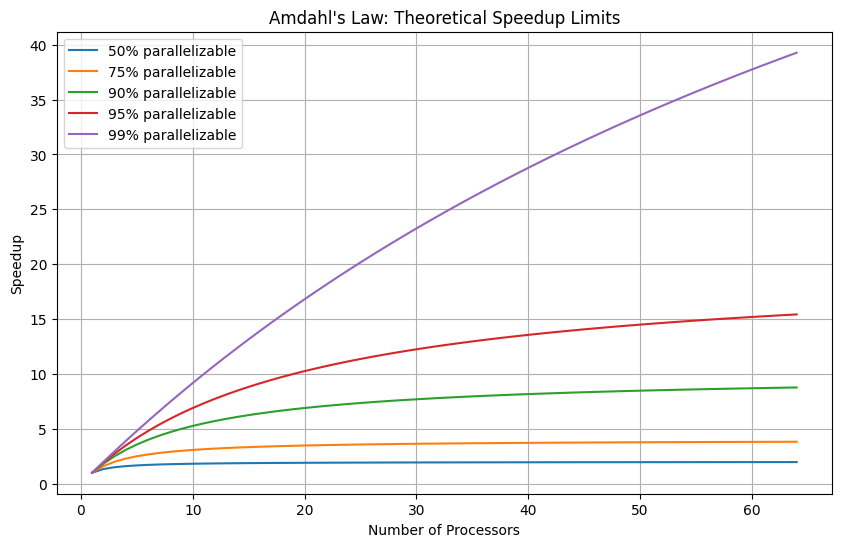

In [81]:
import matplotlib.pyplot as plt
import numpy as np

def amdahls_law(p, n):
    """
    Calculate theoretical speedup using Amdahl's Law.
    p: fraction of program that can be parallelized (0 to 1)
    n: number of processors
    """
    return 1 / ((1 - p) + p / n)

# Visualize Amdahl's Law
processors = np.arange(1, 65)
parallel_fractions = [0.5, 0.75, 0.9, 0.95, 0.99]

plt.figure(figsize=(10, 6))
for p in parallel_fractions:
    speedups = [amdahls_law(p, n) for n in processors]
    plt.plot(processors, speedups, label=f'{p*100:.0f}% parallelizable')

plt.xlabel('Number of Processors')
plt.ylabel('Speedup')
plt.title("Amdahl's Law: Theoretical Speedup Limits")
plt.legend()
plt.grid(True)
plt.show()

### 3. Benchmarking Parallel Code

In [82]:
import multiprocessing as mp
import time

def cpu_intensive(n):
    """CPU-intensive computation"""
    total = 0
    for i in range(n):
        total += i ** 0.5
    return total

def benchmark_parallel(func, data, max_workers=None):
    """Benchmark a function with different numbers of workers"""
    if max_workers is None:
        max_workers = mp.cpu_count()
    
    results = []
    
    # Sequential baseline
    start = time.perf_counter()
    sequential_results = [func(d) for d in data]
    sequential_time = time.perf_counter() - start
    results.append((1, sequential_time, 1.0))
    print(f"Sequential: {sequential_time:.4f}s")
    
    # Parallel with different worker counts
    for n_workers in range(2, max_workers + 1):
        start = time.perf_counter()
        with mp.Pool(n_workers) as pool:
            parallel_results = pool.map(func, data)
        parallel_time = time.perf_counter() - start
        speedup = sequential_time / parallel_time
        efficiency = speedup / n_workers
        results.append((n_workers, parallel_time, speedup))
        print(f"Workers={n_workers}: {parallel_time:.4f}s, Speedup={speedup:.2f}x, Efficiency={efficiency:.1%}")
    
    return results

# Run benchmark
data = [1000000] * 16
benchmark_results = benchmark_parallel(cpu_intensive, data)

Sequential: 2.1865s
Workers=2: 1.4067s, Speedup=1.55x, Efficiency=77.7%
Workers=3: 2.2746s, Speedup=0.96x, Efficiency=32.0%
Workers=4: 0.9787s, Speedup=2.23x, Efficiency=55.9%
Workers=5: 1.0859s, Speedup=2.01x, Efficiency=40.3%
Workers=6: 1.2054s, Speedup=1.81x, Efficiency=30.2%
Workers=7: 0.8777s, Speedup=2.49x, Efficiency=35.6%
Workers=8: 0.7935s, Speedup=2.76x, Efficiency=34.4%
Workers=9: 0.7896s, Speedup=2.77x, Efficiency=30.8%
Workers=10: 0.6782s, Speedup=3.22x, Efficiency=32.2%
Workers=11: 0.8026s, Speedup=2.72x, Efficiency=24.8%
Workers=12: 0.8113s, Speedup=2.70x, Efficiency=22.5%
Workers=13: 1.4043s, Speedup=1.56x, Efficiency=12.0%
Workers=14: 1.5602s, Speedup=1.40x, Efficiency=10.0%
Workers=15: 1.0525s, Speedup=2.08x, Efficiency=13.8%
Workers=16: 0.9838s, Speedup=2.22x, Efficiency=13.9%
Workers=17: 0.9869s, Speedup=2.22x, Efficiency=13.0%
Workers=18: 0.9214s, Speedup=2.37x, Efficiency=13.2%
Workers=19: 0.7786s, Speedup=2.81x, Efficiency=14.8%
Workers=20: 0.8214s, Speedup=2.66x

**Question 7.1**: Create a comprehensive benchmark suite that:
1. Tests different chunk sizes
2. Tests different data sizes
3. Generates visualizations comparing performance
4. Identifies the optimal configuration for your workload

In [83]:
# TODO: Create comprehensive benchmark suite


### 4. Profiling and Optimization

In [84]:
import cProfile
import pstats
from io import StringIO

def profile_function(func, *args, **kwargs):
    """Profile a function and print results"""
    profiler = cProfile.Profile()
    profiler.enable()
    result = func(*args, **kwargs)
    profiler.disable()
    
    stream = StringIO()
    stats = pstats.Stats(profiler, stream=stream)
    stats.sort_stats('cumulative')
    stats.print_stats(10)
    print(stream.getvalue())
    
    return result

def function_to_profile():
    """Example function to profile"""
    data = [i**2 for i in range(100000)]
    filtered = list(filter(lambda x: x % 2 == 0, data))
    total = sum(filtered)
    return total

profile_function(function_to_profile)

         100004 function calls in 0.103 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.016    0.016    0.103    0.103 /tmp/ipykernel_19/1149560464.py:20(function_to_profile)
        1    0.068    0.068    0.068    0.068 /tmp/ipykernel_19/1149560464.py:22(<listcomp>)
   100000    0.018    0.000    0.018    0.000 /tmp/ipykernel_19/1149560464.py:23(<lambda>)
        1    0.001    0.001    0.001    0.001 {built-in method builtins.sum}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}





166661666700000

**Question 7.2**: Profile and optimize the image processing pipeline from Exercise 4:
1. Identify the three biggest bottlenecks
2. Apply optimizations to each
3. Measure the improvement
4. Document your optimization process

In [85]:
# TODO: Profile and optimize


### 5. Real-World Case Study

**Question 7.3**: Build a complete data processing system that:
1. Reads data from multiple CSV files (100+ files)
2. Cleans and transforms each file
3. Aggregates results across all files
4. Writes the final output

Implement both sequential and parallel versions, benchmark them, and document the speedup achieved.

In [86]:
# TODO: Implement real-world case study


## Summary

In this practical, you learned:

1. **Functional Programming**: Using `filter()`, `map()`, `reduce()` for data transformations
2. **Lambda Expressions**: Creating concise, inline functions
3. **Generators**: Memory-efficient processing of large datasets
4. **Multiprocessing**: Parallel execution using `Pool` and process-based parallelism
5. **Inter-Process Communication**: Using Queues and shared memory
6. **concurrent.futures**: High-level interface for parallel execution
7. **Performance Optimization**: Benchmarking, profiling, and optimizing parallel code

These concepts form the foundation for distributed computing frameworks like Apache Spark, which you'll explore in Practical 5.

## Next Steps

Continue to **Practical 5: Apache Spark for Massive Data Processing** to learn how these parallel processing concepts scale to distributed computing across clusters.